In [1]:
import sys
sys.path.append('../scripts')

import numpy as np
import pandas as pd

from yahoo_stock_data import YahooStockData
from data_handler import DataHandler
from arima import AlgoARIMA

In [2]:
START_DATE = '2000-01-01'
TARGET     = 'High'
TIMEFRAME  = -1
LOG_RETURN = True
TEST_SIZE  = 0.2

ticker_list = ['MSFT']

si_from_yahoo = YahooStockData(ticker_list[0])
si_data = si_from_yahoo.get_data(START_DATE)
si_data.reset_index(inplace=True)
# si_data.to_csv('MSFT.csv', index=False)
# si_data = pd.read_csv('MSFT.csv')

[*********************100%***********************]  1 of 1 completed


In [3]:
data_handler = DataHandler(si_data, TARGET, TIMEFRAME, LOG_RETURN, TEST_SIZE)
algo_arima = AlgoARIMA(data_handler.y_train)
forecasts = algo_arima.get_forecasts(len(data_handler.y_val) + len(data_handler.y_test))

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21730.131, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22861.378, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-24580.883, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-21732.131, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-24583.252, Time=1.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-24571.883, Time=1.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-24560.515, Time=0.98 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-24583.402, Time=1.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-24484.460, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-24573.549, Time=1.62 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-24586.304, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-24583.758, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-24584.096, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-24585.556, Time=0.46 sec
 ARIM

/home/shiv/anaconda3/envs/ts3_9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/shiv/anaconda3/envs/ts3_9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   20    f= -2.75117D+00    |proj g|=  1.18322D+00

At iterate   25    f= -2.76818D+00    |proj g|=  6.99391D-01

At iterate   30    f= -2.76878D+00    |proj g|=  1.79777D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     48      1     0     0   2.643D-03  -2.769D+00
  F =  -2.7687799678480904     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/shiv/anaconda3/envs/ts3_9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


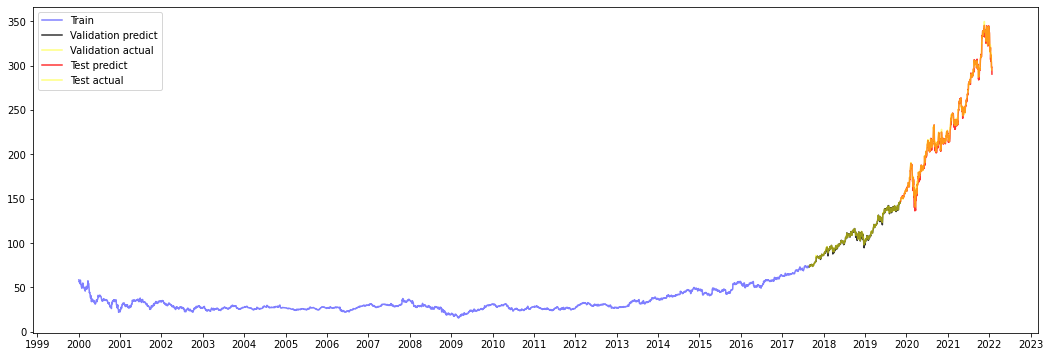


Predicted value: 290.35589359033025


,mse,mae,rmse,mape
Test Results,10.770274,2.232602,3.28181,0.01036


In [4]:
forecast, val_results, test_results = data_handler.process_forecasts(forecasts)
print()
print("Predicted value:", forecast[-1])
pd.DataFrame(test_results, index=['Test Results'])